## <center>The Sparks Foundation</center>
### <center>TASK #3 - Exploratory Data Analysis - Retail</center>
### <center>Domain : Data Science and Business Analytics</center>
### <center>Author : Akshay Pandurang Paunikar</center>

#### Objective:
    1. Perform Exploratory Data Analysis on dataset 'Sample Superstore'.
    2. As a business manager try to find out the weak areas where you can work to make more profit.
    3. What all business problems you can derive by exploring the data.

In [47]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [48]:
# Set working directory
import io
%cd "E:\TSF-INTERN\TSF-INTERN Tasks\Task#3"

E:\TSF-INTERN\TSF-INTERN Tasks\Task#3


In [49]:
# load the sample superstore data
superstore = pd.read_csv('SampleSuperstore.csv')

### Exploratory Data Analysis

In [50]:
# Check first five records
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [51]:
# dimension of the superstore data
superstore.shape

(9994, 13)

There are total 9994 rows and 13 columns in superstore data

In [52]:
# check datatypes present in superstore data
superstore.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [53]:
# categorical columns
superstore.select_dtypes(include='object').columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')

In [54]:
# numerical columns
superstore.select_dtypes(exclude='object').columns

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [55]:
# Descriptive Statistics of superstore data
superstore.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [56]:
# Concise summary of superstore data
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [57]:
# Check for null/missing values
superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no null or missing values in our data.

### Which Shipping Mode is mostly used ? what are the sales and profit w.r.t different shipping modes ? Show all these results Regionwise.

In [58]:
# Ship Mode
superstore['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

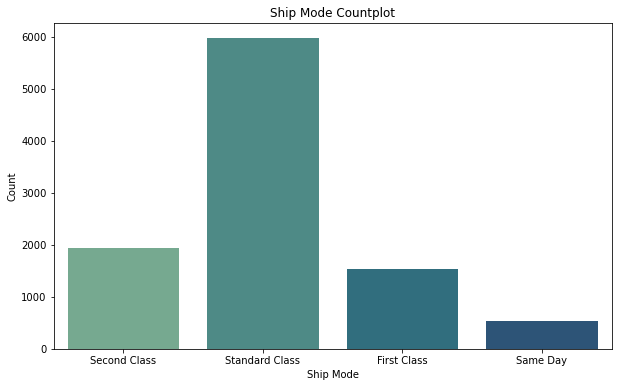

In [59]:
# Ship Mode
plt.figure(figsize=(10,6))
sns.countplot(x='Ship Mode',data=superstore,palette='crest')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.title('Ship Mode Countplot')
plt.show()

In [60]:
# which Ship Mode has maximum sales and profit?
superstore.groupby(['Ship Mode'])[['Sales','Profit']].sum().sort_values(ascending=False,by=['Sales','Profit'])

,Sales,Profit
Ship Mode,,
Standard Class,1.358216e+06,164088.7875
Second Class,4.591936e+05,57446.6354
First Class,3.514284e+05,48969.8399
Same Day,1.283631e+05,15891.7589


In [61]:
# Which Region has maximum sales and profit?
superstore.groupby(['Region'])[['Sales','Profit']].sum().sort_values(ascending=False,by=['Sales','Profit'])

,Sales,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


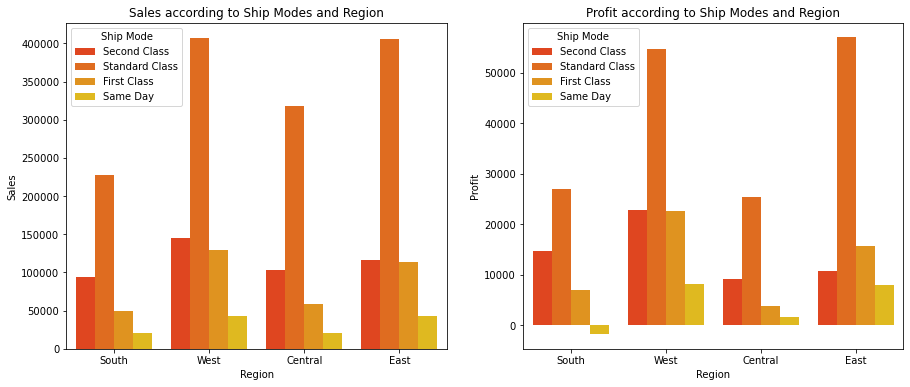

In [62]:
plt.figure(figsize=(15,6))
#Ship Mode and Sales
plt.subplot(1,2,1)
sns.barplot(x=superstore['Region'],y=superstore.Sales,hue=superstore['Ship Mode'],estimator=np.sum,ci=None,palette='autumn')
plt.title('Sales according to Ship Modes and Region')

#Ship Mode and Profit
plt.subplot(1,2,2)
sns.barplot(x=superstore['Region'],y=superstore.Profit,hue=superstore['Ship Mode'],estimator=np.sum,ci=None,palette='autumn')
plt.title('Profit according to Ship Modes and Region')
plt.show()

From above analysis can say that the <b>Standard Class</b> is the most common <b>Shipping Mode</b> compared to other modes. Also the <b>Standard Class</b> has Maximum <b>Sales</b> and <b>Profit</b> compared to other class in every <b>Region.</b>

### What are the different segments present in the data ? How much Sales and Profit is generated ? Show all these results Regionwise.

In [63]:
# Segment
superstore['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

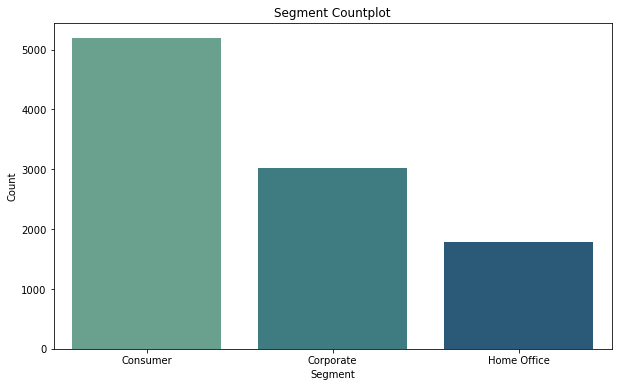

In [64]:
# Segment
plt.figure(figsize=(10,6))
sns.countplot(x='Segment',data=superstore,palette='crest')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Segment Countplot')
plt.show()

In [65]:
# which Ship Mode has maximum sales and profit?
superstore.groupby(['Segment'])[['Sales','Profit']].sum().sort_values(ascending=False,by=['Sales','Profit'])

,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


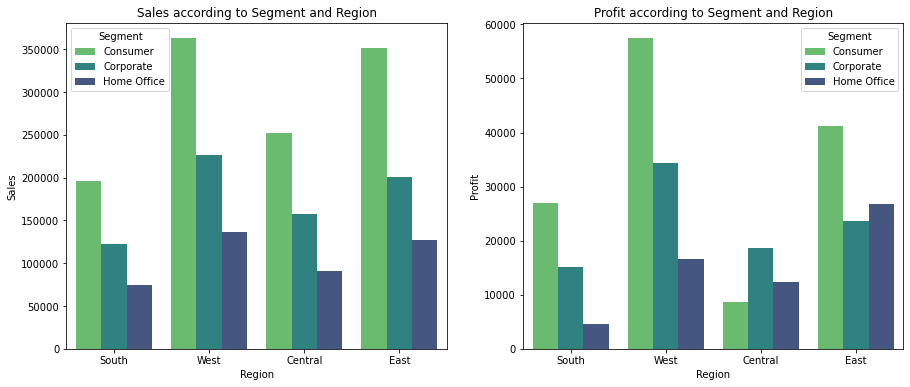

In [66]:
plt.figure(figsize=(15,6))
#Segment and Sales
plt.subplot(1,2,1)
sns.barplot(x=superstore['Region'],y=superstore.Sales,hue=superstore['Segment'],estimator=np.sum,ci=None,palette='viridis_r')
plt.title('Sales according to Segment and Region')

#Segment and Profit
plt.subplot(1,2,2)
sns.barplot(x=superstore['Region'],y=superstore.Profit,hue=superstore['Segment'],estimator=np.sum,ci=None,palette='viridis_r')
plt.title('Profit according to Segment and Region')
plt.show()

From above analysis we can say that the <b>Consumer</b> segment has maximum <b>Sales</b> in all the <b>Region</b> and maximum <b>Profit</b> in <b>South, West</b> and <b>East Region</b>. In <b>Central Region,</b> <b>Corporate</b> has maximum <b>Profit</b>. 

### What is the relation between Profit generated and Discount given ?

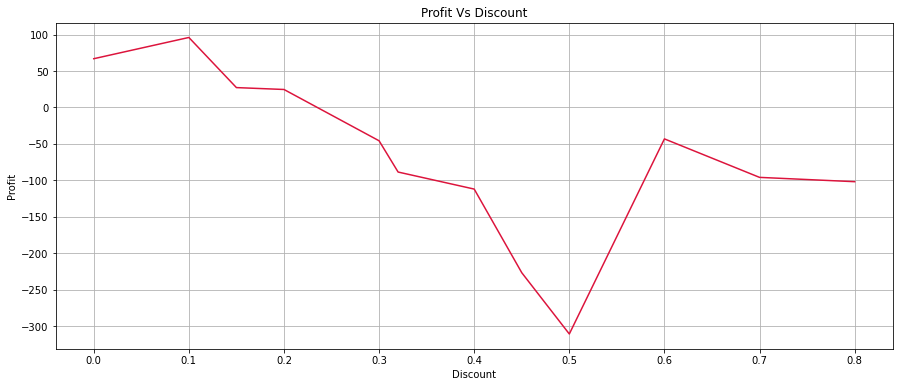

In [67]:
# Profit Vs Discount
plt.figure(figsize=(15,6))
sns.lineplot(x='Discount',y='Profit',data=superstore,estimator=np.mean,ci=None,color='crimson')
plt.grid()
plt.title('Profit Vs Discount')
plt.show()

From above analysis we can say that <b>Discount</b> should be between <b>10% to 20%</b> to have maximum <b>Profit</b>.

### What are the different Category and Sub-Category that are present in the data? How much sales and profit is generated? How much quantities are sold ?

In [68]:
# Category
superstore.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [69]:
# Sub-Category
superstore['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

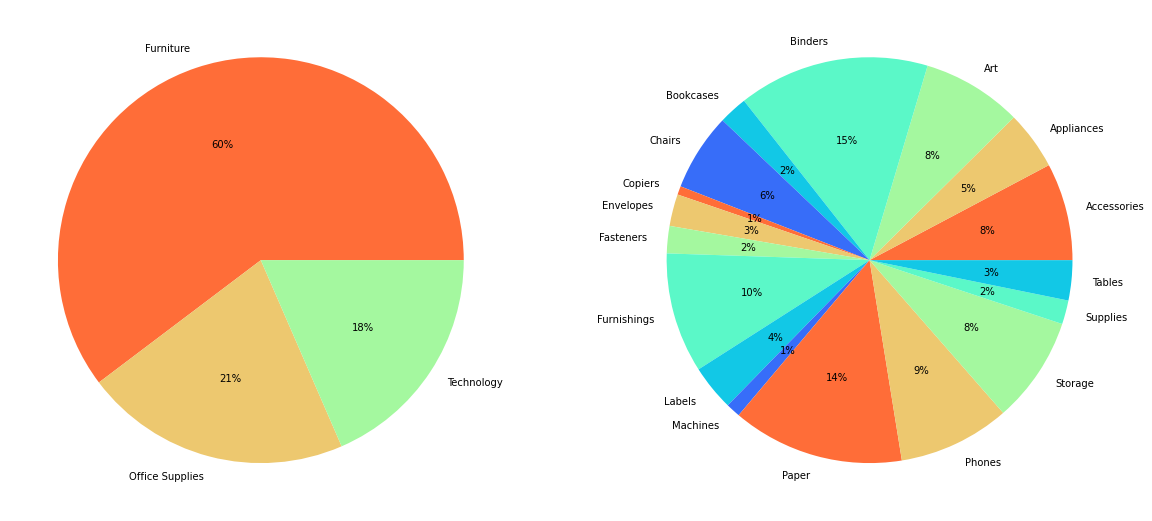

In [70]:
# Pie chart of Category
cat_data = superstore.Category.value_counts()
cat_labels = np.unique(superstore.Category)

colors = sns.color_palette('rainbow_r')[0:4]

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.pie(cat_data, labels = cat_labels, colors = colors, autopct='%.0f%%')

# pie chart of Sub-category
subcat_data = superstore['Sub-Category'].value_counts().sort_index()
subcat_labels = np.unique(superstore['Sub-Category'])

colors = sns.color_palette('rainbow_r')[0:18]

plt.subplot(1,2,2)
plt.pie(subcat_data, labels = subcat_labels, colors = colors, autopct='%.0f%%')

plt.show()

In [71]:
# Quantity Sales and Profit w.r.t Category
superstore.groupby(['Category','Sub-Category'])[['Sales','Profit','Quantity']].sum().sort_values(ascending=False,
                                                                                                 by=['Category','Profit'])

Sales      Profit  Quantity
Category        Sub-Category                                   
Technology      Copiers       149528.0300  55617.8249       234
                Phones        330007.0540  44515.7306      3289
                Accessories   167380.3180  41936.6357      2976
                Machines      189238.6310   3384.7569       440
Office Supplies Paper          78479.2060  34053.5693      5178
                Binders       203412.7330  30221.7633      5974
                Storage       223843.6080  21278.8264      3158
                Appliances    107532.1610  18138.0054      1729
                Envelopes      16476.4020   6964.1767       906
                Art            27118.7920   6527.7870      3000
                Labels         12486.3120   5546.2540      1400
                Fasteners       3024.2800    949.5182       914
                Supplies       46673.5380  -1189.0995       647
Furniture       Chairs        328449.1030  26590.1663      2356
                Furnishings    91705.1640  13059.1436      3563
                Bookcases     114879.9963  -3472.5560       868
                Tables        206965.5320 -17725.4811      1241

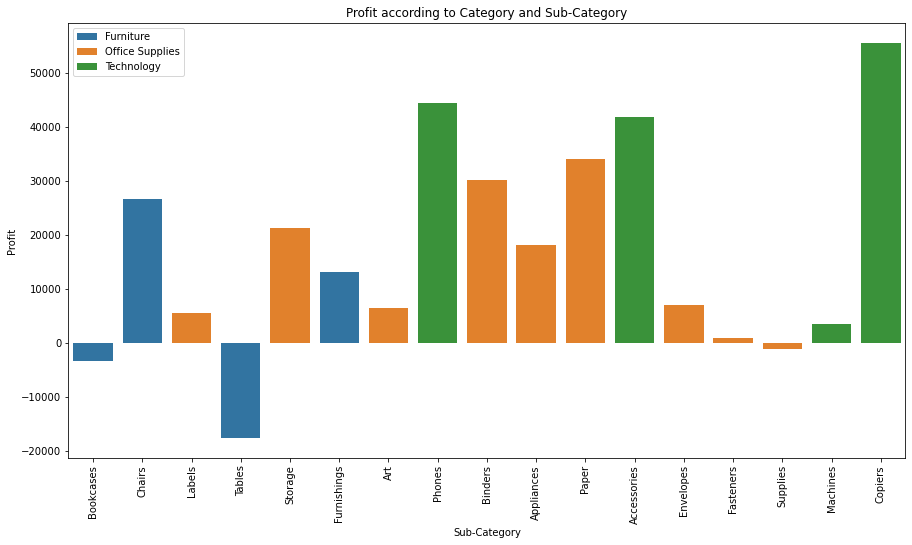

In [72]:
# Profit according to Category and Sub-Category
plt.figure(figsize=(15,8))
sns.barplot(x=superstore['Sub-Category'],y=superstore.Profit,hue=superstore['Category'],estimator=np.sum,ci=None,dodge=False)
plt.xticks(rotation=90)
plt.title('Profit according to Category and Sub-Category')
plt.legend(loc='upper left')
plt.show()

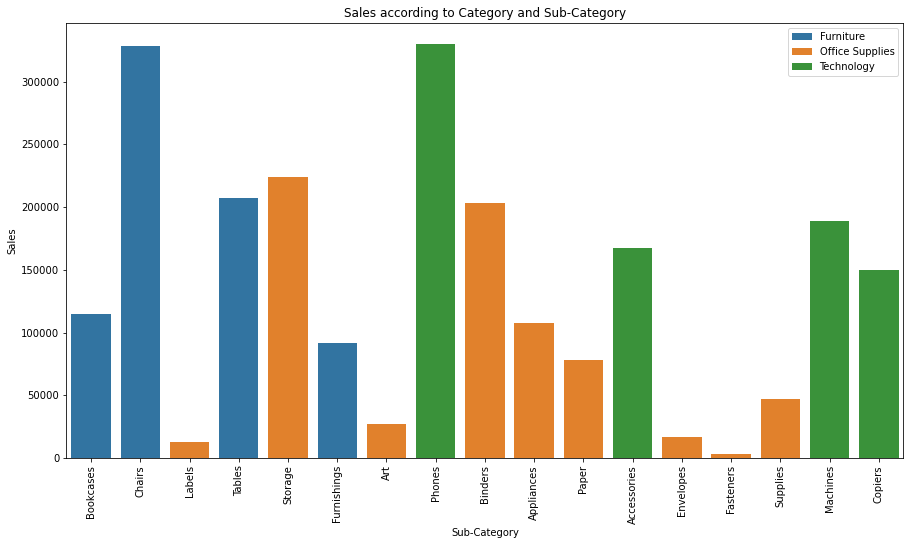

In [73]:
# Sales according to Category and Sub-Category
plt.figure(figsize=(15,8))
sns.barplot(x=superstore['Sub-Category'],y=superstore.Sales,hue=superstore['Category'],estimator=np.sum,ci=None,dodge=False)
plt.xticks(rotation=90)
plt.title('Sales according to Category and Sub-Category')
plt.legend(loc='upper right')
plt.show()

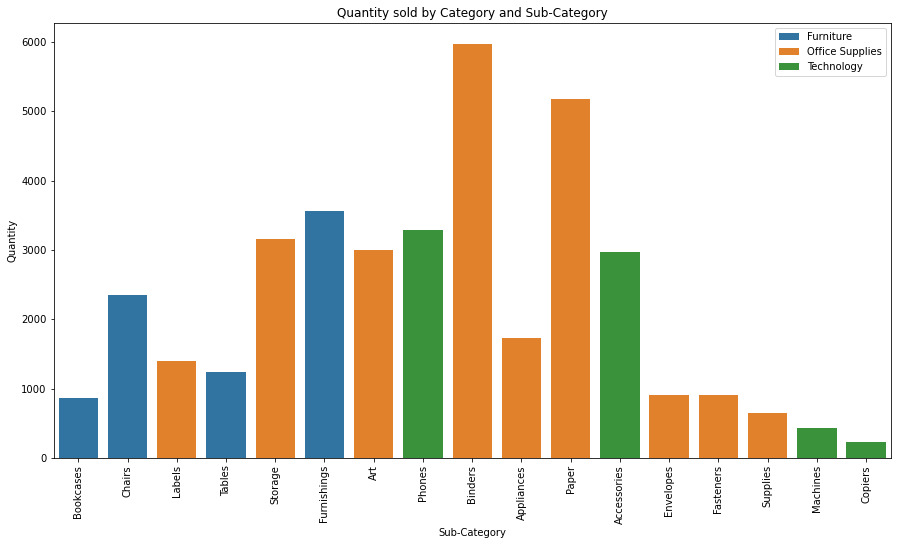

In [74]:
# Quantity sold according to Category and Sub-Category
plt.figure(figsize=(15,8))
sns.barplot(x=superstore['Sub-Category'],y=superstore.Quantity,hue=superstore['Category'],estimator=np.sum,ci=None,dodge=False)
plt.xticks(rotation=90)
plt.title('Quantity sold by Category and Sub-Category')
plt.legend(loc='upper right')
plt.show()

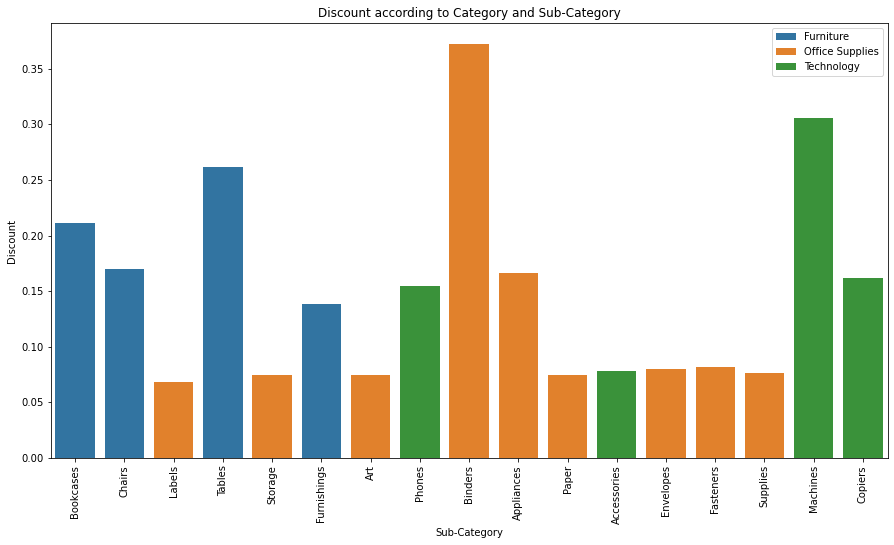

In [75]:
# Discount according to Category and Sub-Category
plt.figure(figsize=(15,8))
sns.barplot(x=superstore['Sub-Category'],y=superstore.Discount,hue=superstore['Category'],estimator=np.mean,ci=None,dodge=False)
plt.xticks(rotation=90)
plt.title('Discount according to Category and Sub-Category')
plt.legend(loc='upper right')
plt.show()

In <b>Furniture</b> Category, <b>Chairs</b> has maximum <b>Profit</b> & <b>Sales</b>. However, <b>Furnishings</b> has maximum <b>Quantity</b> Sold and maximum <b>Discount</b> is given to <b>Tables</b>.
<br>
In <b>Office Supplies</b> Category, <b>Paper</b> has maximum <b>Profit</b>, <b>Storage</b> has maximum <b>Sales</b> and <b>Binders</b> has maximum <b>Quantity</b> Sold and <b>Discount</b> given.
<br>
In <b>Technology</b> Category, <b>Copiers</b> has maximum <b>Profit</b>, <b>Phones</b> has maximum <b>Sales</b> and <b>Quantity</b> Sold and <b>Machines</b> has maximum <b>Discount</b> given.
<br>
Overall <b>Copiers</b> has maximum <b>Profit</b>, <b>Phones</b> has maximum <b>Sales</b> and <b>Binders</b> has maximum <b>Quantity</b> Sold and <b>Discount</b> given.

### What are the Sales and Profit generated according to different States ?

In [76]:
# State Column
superstore.State.value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [77]:
superstore.groupby('State')[['Sales','Profit']].sum().sort_values(ascending=False,by='Profit')

,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486
Washington,138641.2700,33402.6517
Michigan,76269.6140,24463.1876
Virginia,70636.7200,18597.9504
Indiana,53555.3600,18382.9363
Georgia,49095.8400,16250.0433
Kentucky,36591.7500,11199.6966
Minnesota,29863.1500,10823.1874


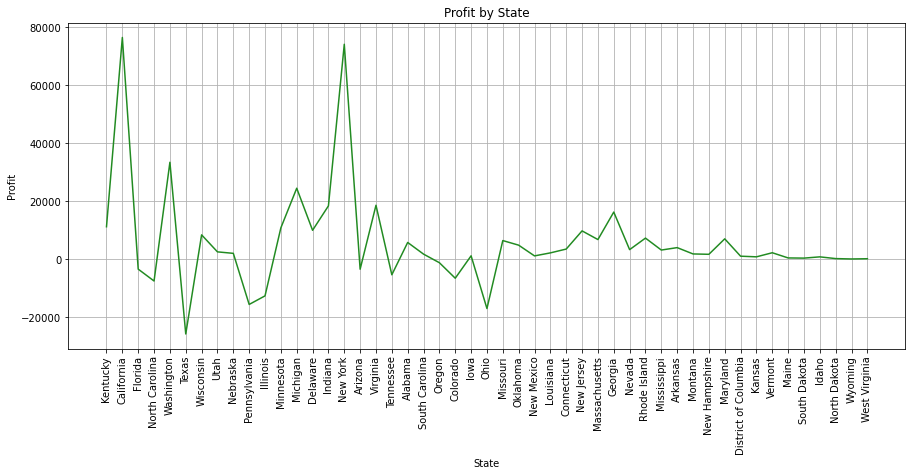

In [78]:
# Profit by State
plt.figure(figsize=(15,6))
sns.lineplot(x='State',y='Profit',data=superstore,estimator=np.sum,ci=None,color='forestgreen')
plt.xticks(rotation=90)
plt.grid()
plt.title('Profit by State')
plt.show()

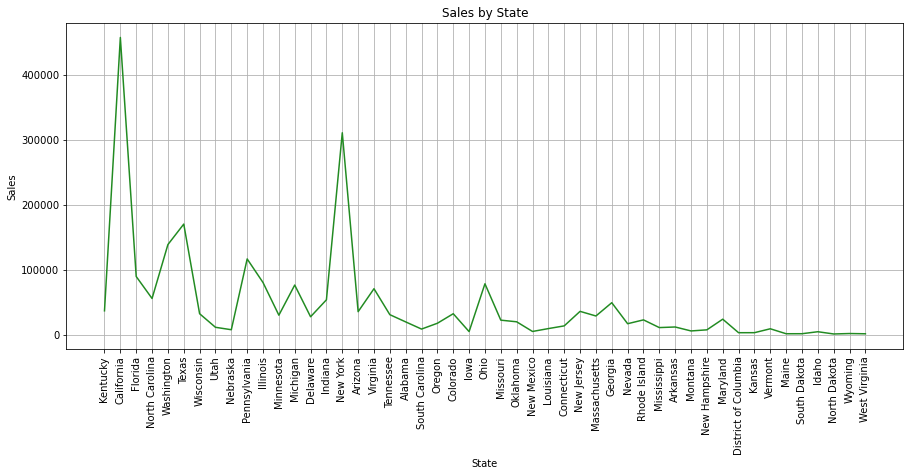

In [79]:
# Sales by State
plt.figure(figsize=(15,6))
sns.lineplot(x='State',y='Sales',data=superstore,estimator=np.sum,ci=None,color='forestgreen')
plt.xticks(rotation=90)
plt.grid()
plt.title('Sales by State')
plt.show()

So from above analysis we can say that the maximum <b>Profit</b> and <b>Sales</b> is generated from <b>State - California</b> and lowest <b>Profit</b> from <b>State - Texas</b> and lowest <b>Sales</b> from <b>State - North Dakota</b>.

### Which are the Top 10 Cities where Profit is maximum ? Which are Bottom 10 Cities where Profit is lowest ?

In [80]:
top10 = superstore.groupby('City')[['Sales','Profit']].sum().sort_values(ascending=False,by='Profit').head(10)
top10

,Sales,Profit
City,,
New York City,256368.161,62036.9837
Los Angeles,175851.341,30440.7579
Seattle,119540.742,29156.0967
San Francisco,112669.092,17507.3854
Detroit,42446.944,13181.7908
Lafayette,25036.200,10018.3876
Jackson,24963.858,7581.6828
Atlanta,17197.840,6993.6629
Minneapolis,16870.540,6824.5846


In [81]:
bottom10 = superstore.groupby('City')[['Sales','Profit']].sum().sort_values(ascending=False,by='Profit').tail(10)
bottom10

,Sales,Profit
City,,
Jacksonville,44713.1830,-2323.8350
Aurora,11656.4780,-2691.7386
Phoenix,11000.2570,-2790.8832
Dallas,20131.9322,-2846.5257
Burlington,21668.0820,-3622.8772
Chicago,48539.5410,-6654.5688
Lancaster,9891.4640,-7239.0684
San Antonio,21843.5280,-7299.0502
Houston,64504.7604,-10153.5485


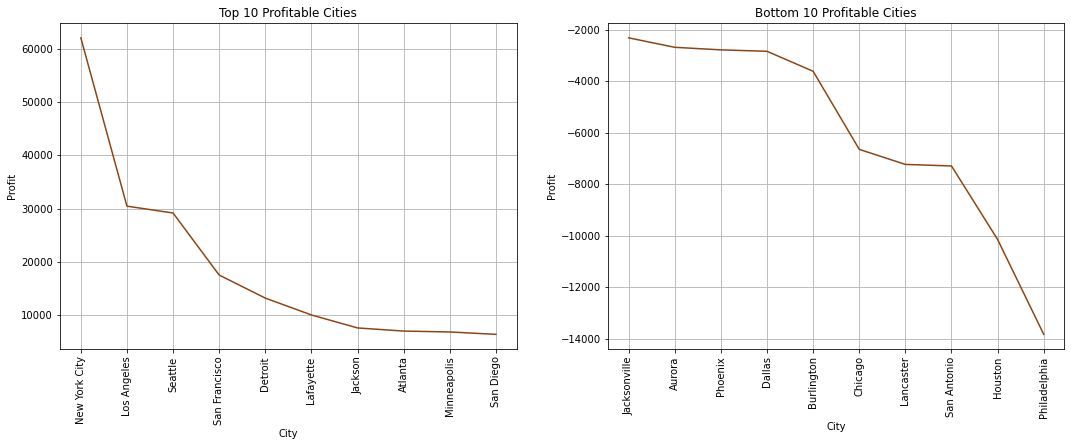

In [82]:
plt.figure(figsize=(18,6))

# Top 10 Profitable Cities
plt.subplot(1,2,1)
sns.lineplot(x=top10.index,y=top10.Profit,color='saddlebrown')
plt.xticks(rotation=90)
plt.title("Top 10 Profitable Cities")
plt.grid()

# Bottom 10 Profitable Cities
plt.subplot(1,2,2)
sns.lineplot(x=bottom10.index,y=bottom10.Profit,color='saddlebrown')
plt.xticks(rotation=90)
plt.title("Bottom 10 Profitable Cities")
plt.grid()

plt.show()

Above linechart gives us the names of <b>Top-10</b> & <b>Bottom-10</b> Cities according to <b>Profit</b> generated.

#### Summary :
   1. <b>Standard Class</b> is the most preferred <b>Shipping Mode</b> and has generated highest <b>Sales</b> and <b>Profit</b> in each <b>Region</b>.
   2. The <b>Consumer</b> segment has maximum <b>Sales</b> in all the <b>Region</b> and maximum <b>Profit</b> in <b>South, West</b> and <b>East Region</b>. In <b>Central Region,</b> <b>Corporate</b> has maximum <b>Profit</b>. 
   3. We should give <b>Discount</b> between <b>10% to 20%</b> to have maximum <b>Profit</b>.
   4. In <b>Furniture</b> Category, <b>Chairs</b> has maximum <b>Profit</b> & <b>Sales</b>. However, <b>Furnishings</b> has maximum <b>Quantity</b> Sold and maximum <b>Discount</b> is given to <b>Tables</b>.
   5. In <b>Office Supplies</b> Category, <b>Paper</b> has maximum <b>Profit</b>, <b>Storage</b> has maximum <b>Sales</b> and <b>Binders</b> has maximum <b>Quantity</b> Sold and <b>Discount</b> given.
   6. In <b>Technology</b> Category, <b>Copiers</b> has maximum <b>Profit</b>, <b>Phones</b> has maximum <b>Sales</b> and <b>Quantity</b> Sold and <b>Machines</b> has maximum <b>Discount</b> given.
   7. Overall <b>Copiers</b> has maximum <b>Profit</b>, <b>Phones</b> has maximum <b>Sales</b> and <b>Binders</b> has maximum <b>Quantity</b> Sold and <b>Discount</b> given.
   8. <b>New York</b> has generated maximum <b>Profit</b> and <b>Philadelphia</b> has generated lowest <b>Profit</b>.